In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [6]:
# This is the code coverage obtain by running AFLNET only with the seed corpus
# AFLNET was run in **stateless** mode for this baseline
# These values are going to be used as baseline for a comparison with a 24h fuzzing campaign

# Note: the timestamp does not make any sense for these tests
# because they are all feed at the start of the fuzzing campaign

df_stateless_input = pd.read_csv("coverage_analysis_29-07-2022/cov_over_time_stateless_input.csv")
df_stateless_input_mqtt_fuzz = pd.read_csv("coverage_analysis_29-07-2022/cov_over_time_stateless_input_mqtt_fuzz.csv")
df_stateless_input["l_per"]

0    23.1
1    24.7
2    24.7
Name: l_per, dtype: float64

In [7]:
df = pd.read_csv("coverage_analysis_29-07-2022/cov_over_time.csv")
# df

In [8]:
start = df["Time"].iloc[0]
finish = df["Time"].iloc[-1]

df["Time"] = df["Time"].apply(lambda t: (t - start) / 60)
# df["Time"]

In [9]:
df["l_abs"].min()

1851

In [10]:
df["l_abs"].max()

2420

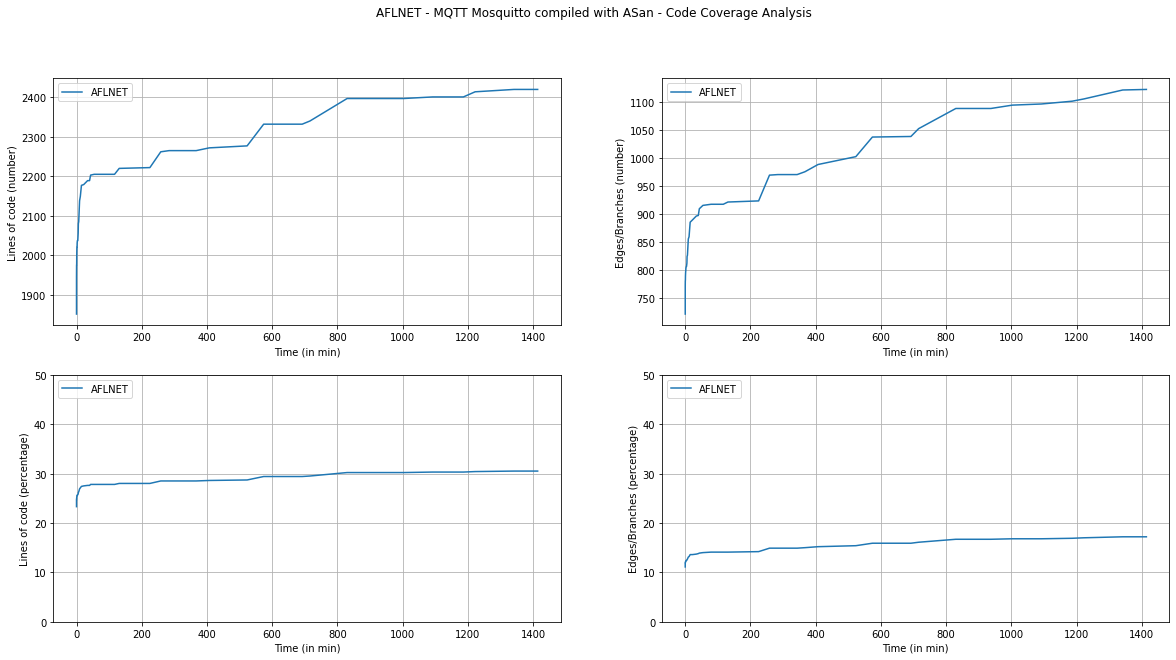

In [11]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
fig.suptitle("AFLNET - MQTT Mosquitto compiled with ASan - Code Coverage Analysis")

axes[0, 0].plot(df["Time"], df["l_abs"])
axes[0, 0].set_xlabel('Time (in min)')
axes[0, 0].set_ylabel('Lines of code (number)')

axes[1, 0].set_ylim(0,50)
axes[1, 0].plot(df["Time"], df["l_per"])
axes[1, 0].set_xlabel('Time (in min)')
axes[1, 0].set_ylabel('Lines of code (percentage)')

axes[0, 1].plot(df["Time"], df["b_abs"])
axes[0, 1].set_xlabel('Time (in min)')
axes[0, 1].set_ylabel('Edges/Branches (number)')

axes[1,1].set_ylim(0,50)
axes[1, 1].plot(df["Time"], df["b_per"])
axes[1, 1].set_xlabel('Time (in min)')
axes[1, 1].set_ylabel('Edges/Branches (percentage)')

for _, ax in enumerate(fig.axes):
    ax.legend(("AFLNET",), loc='upper left')
    ax.grid()

# plt.savefig("coverage_analysis_29-07-2022/coverage_graphs_29-07-2022.png", transparent=True, facecolor='white')

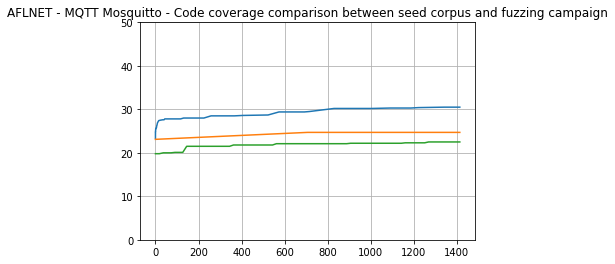

In [35]:
plt.title("AFLNET - MQTT Mosquitto - Code coverage comparison between seed corpus and fuzzing campaign")
plt.ylim(0,50)
plt.plot(df["Time"], df["l_per"])
plt.plot(np.linspace(df["Time"].iloc[0], df["Time"].iloc[-1], df_stateless_input["l_per"].size),df_stateless_input["l_per"])
plt.plot(np.linspace(df["Time"].iloc[0], df["Time"].iloc[-1], df_stateless_input_mqtt_fuzz["l_per"].size),df_stateless_input_mqtt_fuzz["l_per"])
plt.grid()

# plt.savefig("coverage_analysis_29-07-2022/coverage_seed_corpus_baseline_29-07-2022.png", transparent=True, facecolor='white')